# NLP processing in advance data

So after first 5 notebook, we have a good understanding about preprocessing and exploring data. But in some real world problem, we need to work with advance data processing. In this notebook, I will show you how to work with advance data processing in NLP.

Different from what we have previously done, we will use the `spacy`, `nltk` and `spicy` library to process the text data.

## Basic Flow

### Stopwords / Punctuation Removal


Stopwords are the words that are most common in any language. These words are removed from the text data as they do not provide any valuable information. For example, in English, words like 'a', 'the', 'is', 'and', etc. are considered as stopwords.

Same as Punctuation, we can remove it from the text data.

In [38]:
import spacy
from string import punctuation

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

print(doc)
    
# Remove stop words and punctuation
filtered_tokens = [token.text for token in doc if not token.is_stop and token.text not in punctuation]
print(filtered_tokens)

It’s official: Apple is the first U.S. public company to reach a $1 trillion market value
['official', 'Apple', 'U.S.', 'public', 'company', 'reach', '1', 'trillion', 'market', 'value']


### Tokenization

Tokenization is one of the most important steps in text preprocessing. Whether you are working with traditional NLP techniques or using advanced deep learning techniques, this step cannot be skipped. Simply put, tokenization is the process of breaking down a phrase, sentence, paragraph, or one or more text documents into smaller units. Each of these smaller units is called Tokens.

Tokens can be considered as the building blocks of NLP and all NLP models process raw text at the Token level. They are used to create a vocabulary in a corpus (a data set in NLP). This vocabulary is then converted into numbers (IDs) and helps us model it. Tokens can be anything – a word, a sub-word or even a character. Different algorithms follow different processes in performing the encoding and the differences between these three types of tokens will be outlined below.

In example, we have a sentence: "I am learning NLP". I will using all the popular methods below and show you how the results will be:

**1. Word-based tokenization**

This is a commonly used tokenization technique in text analysis. It divides a text into words (e.g. English) or syllables (e.g. Vietnamese) based on the delimiter. The most commonly used delimiter is the space. However, it is also possible to split text without delimiter. For example, splitting words in Vietnamese because a word in Vietnamese can contain 2 or 3 syllables connected by a space.

Word segmentation can be done easily using RegEx or Python’s split() method. In addition, there are many Python libraries – NLTK, spaCy, Keras, Gensim, which can help you do this conveniently.

In [39]:
# Example in NLTK
input1 = "I am learning NLP"
# Nltk

import nltk
from nltk.tokenize import word_tokenize

# Tokenization
print(word_tokenize(input1))

['I', 'am', 'learning', 'NLP']


In fact, NLP models use appropriate word segmentation methods for each language. Depending on the problem, the same text can be processed under different types of tokens. Each token is usually unique and is represented by an ID, which is a way of encoding or identifying the token in the digital space.

The limitation of this technique is that it leads to a huge corpus and a large vocabulary, making the model more cumbersome and requiring more computational resources. Besides, another limitation is related to misspelled words. If the corpus has the word “knowledge” misspelled as “knowldge”, the model will assign the OOV token to the following word. Therefore, to solve all these problems, researchers came up with character based encryption techniques.

**2. Character-based tokenization**

Character-based encoding divides the raw text into individual characters. The logic behind this encoding is that a language has many different words but a fixed number of characters. This results in a very small vocabulary.

For example, English has 256 different characters (letters, numbers, special characters) while containing nearly 170,000 words in its vocabulary. Therefore, character-based encoding will use fewer tokens than word-based encoding.

One of the main advantages of character-based encoding is that there will be no or very few unknown words or OOV. Therefore, it can represent unknown words (words that were not seen during training) by representing each character.

Another advantage is that misspelled words can be respelled correctly, instead of being able to mark them as OOV tokens and losing information.

In [40]:
#Example
input2 = "我喜欢吃面条"
print(list(input2))

['我', '喜', '欢', '吃', '面', '条']


This type of encoding is quite simple and can reduce the complexity of memory and time. So is it the best or perfect algorithm for word segmentation? The answer is no (at least for English Language)! A character usually does not carry any meaning or information like a word.

Also, while this technique reduces the vocabulary size, it increases the string length in character-based encoding. Each word is divided into individual characters and thus the encoded string is much longer than the original plain text. So, it can be seen that although it solves many of the challenges faced by word-based encoding, character-based encoding still has certain problems.

**3. Subword-based tokenization**

Another popular technique is subword encoding. This is a solution that lies between word-based and character-based encoding. The main idea is to simultaneously solve the problems of word-based encoding (very large vocabulary size, many OOV tokens, differences in meaning between very similar words) and character-based encoding (very long strings and less meaningful individual tokens).

Subword encoding algorithms use the following principles.
- Do not divide frequently used words into smaller subwords.
- Divide rare words into meaningful subwords.

Most English models use some form of subword encoding algorithms, of which the most popular are WordPeces used by BERT and DistilBERT, Unigram by XLNet and ALBERT, and Bye-Pair Encoding by GPT-2 and RoBERTa.

Subword-based encoding allows the model to have an appropriate vocabulary size and also learn meaningful context-independent representations. The model can even process a word it has never seen before because the decomposition can lead to known subwords.

In [41]:
from transformers import BertTokenizer

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

print(tokenizer.tokenize(input1))

['i', 'am', 'learning', 'nl', '##p']


**NOTE**: Beside of this there are many other tokenization techniques like SentencePiece, UML, BPE, etc. But in this notebook, I will focus on the above 3 popular techniques.

### Stemming and Lemmatization

Stemming and Lemmatization are the basic text processing methods for English text. The goal of both is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. However, the two words are different.

**Stemming** usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.

**PorterStemmer**

It is one of the most common stemming algorithms which is basically designed to remove and replace well-known suffixes of English words.

In [42]:
# Example
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

for word in word_tokenize(input1):
    print(stemmer.stem(word))

i
am
learn
nlp


**RegexpStemmer**

NLTK has RegexpStemmer class with the help of which we can easily implement Regular Expression Stemmer algorithms. It basically takes a single regular expression and removes any prefix or suffix that matches the expression.

Basically we can build our own stemmer with regular expression (re library in Python) and use it to stem the words.

In [43]:
from nltk.stem import RegexpStemmer

Reg_stemmer = RegexpStemmer("ing")

Reg_stemmer.stem("learning")

'learn'

**Lemmatization** usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

**WordNetLemmatizer**

WordNet is a lexical database for the English language, which was created by Princeton, and is part of the NLTK corpus. It can be used to find the meanings of words, synonyms, antonyms, and more. The WordNetLemmatizer uses the WordNet Database to lookup lemmas of words.

In [44]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize("learning")

'learning'

In [45]:
lemmatizer.lemmatize("books")

'book'

After spend sometime playing with both of them, you can see that they don't have much different right? But the main difference is that stemming technique only looks at the form of the word whereas lemmatization technique looks at the meaning of the word. It means after applying lemmatization, we will always get a valid word.

# Advanced Move

From here, I will dive quickly through every concept and not focus too much on the explanation. If you want to know more about them, please refer to the official documentation or any website.

## Text Normalization

- Unicode Normalization: Normalize text encoding for consistency. Unicode variants of the same character (e.g., different dashes or accent marks) are unified using methods like `NFKC` or `NFD` normalization.

- Handling Rare Words: Beside, some rare words or out-of-vocabulary words can be replaced with more common synonyms or removed entirely.

- Custom Symbol and Emoji: With emoji, we can convert them to text like `:smile:` or `:heart:`, etc.

## Contextual Embeddings

- Named Entity Recognition (NER): Detect and classify named entities in text into predefined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc. This can help enhance models that need to focus on specific entities in the text.

- Coreference Resolution: Identify all expressions that refer to the same entity in a text. This can help improve the understanding of the text and the relationships between entities.

- Sentence Segmentation: For large documents, segmenting long text into meaningful sentences or passages helps in tasks like question-answering, summarization, and more.

## Data Augmentation
- Back-Translation: Translate a sentence to another language and then back to the original language. This can help generate new sentences with the same meaning but different wording. (Or in term of AI data, it's call synthetic data)

- Synonym Replacement: Replace words in a sentence with their synonyms. This can help generate new sentences with the same meaning but different wording.

- Noise Injection: Add noise to the text data by inserting spelling mistakes, typos, or other errors. This can help improve the robustness of models to noisy text data.

- Paraphrasing: Automatically paraphrase sentences using models like GPT-3 or Pegasus to add diversity to training examples.

## Word/Token Embeddings

This one have the same idea as the Subword-based I using above:
- Pre-trained Embeddings: Use pre-trained word embeddings like Word2Vec, GloVe, FastText, or BERT to represent words in a text. This can help improve the performance of models by leveraging the semantic information captured in the embeddings.
- Embedding Normalization: Normalize word embeddings to have unit length or zero mean and unit variance. This can help improve the convergence of models during training.

## Sentence Embeddings / Document-level Embeddings

- Sentence Embeddings: Convert entire sentences or paragraphs into embeddings using models like Sentence-BERT or Universal Sentence Encoder. These embeddings capture sentence-level semantics.

- Passage Embeddings: For long documents, it's useful to compute embeddings over paragraphs or passages for downstream tasks like retrieval or summarization.

## Padding and Truncation

- Padding: Ensure that all text inputs are of uniform length by padding shorter sequences with special tokens like `<pad>` to fit the model’s required input size.

- Truncation: For text sequences that are too long, truncate them to a fixed length. This is crucial for models like BERT, GPT, and other transformer-based architectures that have input token limits.

## Sequence Length Management


- Chunking: Chunking: If you have long documents or passages, break them into smaller, manageable chunks that fit within your model's token limits (common for transformer models with a limit of 512 tokens, for example).

- Sliding Window: For long texts, use a sliding window approach to maintain context across chunks. This can be helpful for summarization and QA tasks.

## Batching and Masking

- Batching: Group your text data into batches for more efficient model training or inference. Batching is especially important when working with deep learning frameworks (e.g., TensorFlow, PyTorch).

- Masking: For some model, add masking to certain tokens during training to predict the masked tokens and help the model learn better representations.

## Handling Imbalanced Data (Classification task)

- Class Balancing: If your dataset is imbalanced (e.g., too many examples of one class and not enough of another), you can apply techniques like:
    - Oversampling: Create more examples of the minority class. (add data or Machine Learning technique like SMOTE)
    - Undersampling: Reduce the number of examples of the majority class.
    - Class Weights: Assign different weights to classes when training the model to handle the imbalance.

## Final Check

- Duplicate Removal: Remove duplicate text data to avoid biasing the model towards certain examples.

- Shuffle: Shuffle the data to ensure that the model does not learn any order-based patterns.

- Train-Test Split: Split the data into training and testing sets to evaluate the model's performance on unseen data.

# Computer vision processing in advance data

So after we have a good understanding about NLP processing in advance data, we can do the same thing with Computer Vision. But, to me it's more "simplier" than NLP.

## Image Resizing

- Aspect Ratio Preservation: When resizing images to fit a model input size, ensure that the aspect ratio is preserved to avoid distortion. It's important to preserve the aspect ratio to avoid distortion. Use padding with a constant value to maintain the original proportions.

- Techniques:
    - Resize with Padding: Resize images to a fixed size by adding padding to maintain the aspect ratio.
    - Center Crop: After resizing, crop the center of the image to fit the model input size.
    - Random Resized Crops: For data augmentation, randomly resize and crop images to different sizes.

(552, 828, 3)
(224, 224, 3)


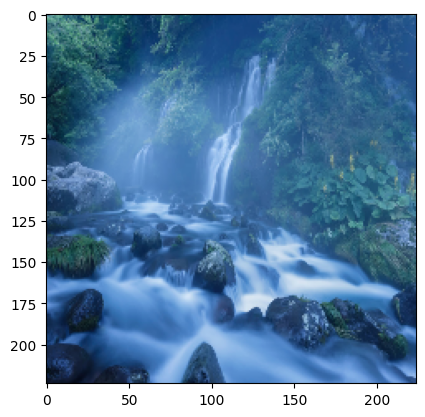

In [46]:
import cv2
import matplotlib.pyplot as plt

# Load the image
pic = cv2.imread("image.jpg")

print(pic.shape)

# Convert the image to RGB (OpenCV uses BGR)
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)

pic = cv2.resize(pic, (224, 224))

print(pic.shape)

plt.imshow(pic)

## Normalization
- Pixel Value Scaling: Convert pixel values from `[0, 255]` to `[0, 1]` or `[-1, 1]` to help the model converge faster during training.
- Per-Channel Normalization: Normalize each channel by subtracting the mean and dividing by the standard deviation to ensure that each channel has zero mean and unit variance.

In [47]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
])(pic)

print(pic[0][0][:10])

# Print first 10 values of the first channel
print(transform[0][0][:10])

[ 97 139 156]
tensor([-0.4568, -0.0287, -0.5596, -0.3712, -0.5253, -0.4568, -0.5424, -0.2342,
        -0.2342, -0.8164])


## Data Augmentation

- Horizontal/Vertical Flips: Flip images horizontally or vertically to increase the diversity of training examples.

- Rotation: Rotate images by a certain angle to add more variety to the training data.

- Color Jittering: Randomly change the brightness, contrast, saturation, and hue of images to make the model more robust to different lighting conditions.

- Gaussian Noise: Add Gaussian noise to images to make the model more robust to noise. (Or blurring)

- Cutout: Randomly remove square patches from images to improve the model's ability to learn from local features.

- Mixup / Cutmix: Blend or combine images from different classes by averaging their pixel values or by cutting a portion of one image and pasting it into another. You can see more [here](https://pytorch.org/vision/main/auto_examples/transforms/plot_cutmix_mixup.html#sphx-glr-auto-examples-transforms-plot-cutmix-mixup-py).

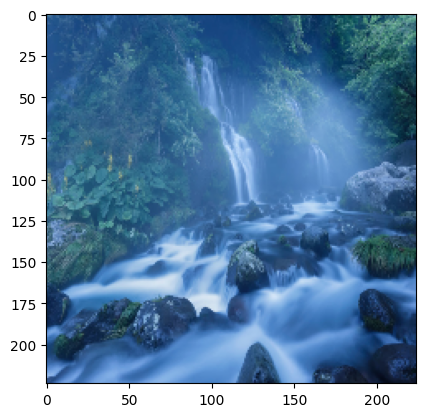

In [49]:
# Uncomment each line or combine them to see the effect of each transformation
test = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p = 1),
    # transforms.RandomVerticalFlip(p = 1),
    # transforms.RandomRotation(45),
    # transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    # transforms.GaussianBlur(5)
])(pic)

plt.imshow(test)

## Histogram Equalization

- Contrast Limited Adaptive Histogram Equalization (CLAHE): This is an advanced technique that adjusts the contrast of an image by normalizing the intensity distribution. It improves the visibility of details in both dark and bright regions of the image.

- Adaptive Histogram Equalization: Apply locally adaptive histogram equalization for images with varying lighting conditions.

In [54]:
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

hist = cv2.calcHist([pic], [0], None, [256], [0, 256])

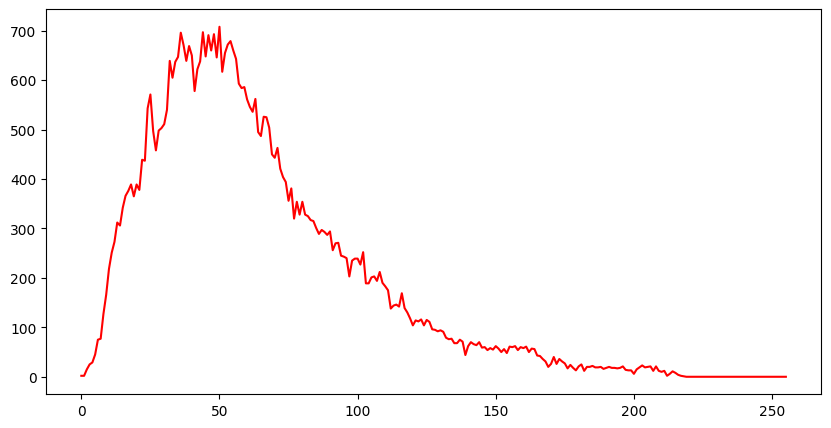

In [55]:
plt.plot(hist, color='r')

In [57]:
def hist_equalize(img):
  # 1. calclate hist
  hist = cv2.calcHist([img], [0], None, [256], [0, 256])

  # 2. normalize hist
  h, w = img.shape[:2]
  hist = hist/(h*w)

  # 3. calculate CDF
  cdf = np.cumsum(hist)
  s_k = (255 * cdf - 0.5).astype("uint8")
  return s_k

In [58]:
s_k = hist_equalize(pic)
equalized_img = cv2.LUT(pic, s_k)

In [59]:
img_equalized = cv2.equalizeHist(cv2.cvtColor(pic, cv2.COLOR_RGB2GRAY))

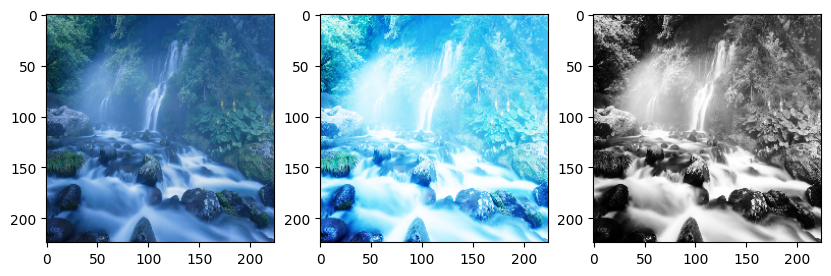

In [61]:
# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(pic)

# Plot the equalized image
plt.subplot(1, 3, 2)
plt.imshow(equalized_img)

# Plot the equalized image using OpenCV
plt.subplot(1, 3, 3)
plt.imshow(img_equalized, cmap='gray')

## Image Filtering (Advanced Smoothing/Sharpening)

- Bilateral Filtering: Preserve edges while smoothing images using bilateral filtering. This is useful for denoising images while preserving important features.

- Edge Detection: Use edge detection algorithms like Canny, Sobel, or Laplacian to detect edges in images. This can help in tasks like object detection and segmentation.

- Gaussian Blur: Apply Gaussian blur to images to reduce noise and detail. This is useful for preprocessing images before feeding them into a model.

## Some advanced Image Augmentation

- Elastic Transformations: Deform the image in random but realistic ways, simulating natural variations like stretching or squeezing.

- Perspective Transformations: Apply perspective transformations to images to simulate different viewpoints or angles.

- Grid Distortions: Apply to stretch and squish parts of the image, making the model more robust.

## Color Space Transformations

- Grayscale Conversion: Convert color images to grayscale to reduce the number of channels and simplify the model.

- Color Space Conversion: Convert images from RGB to other color spaces like HSV, LAB, YUV, etc., to extract different features or improve model performance.

- PCA Color Augmentation: Apply PCA color augmentation to images to change the color distribution and improve the model's generalization.

## Image Binarization and Thresholding (Task-Specific)
- Otsu's Thresholding: Automatically determine the optimal threshold value for image binarization using Otsu's method.

## Image Denoising

- Non-Local Means Denoising: Remove noise from images using non-local means denoising, which is effective for preserving image details.

- Wavelet Denoising: Remove noise while maintaining image edges and other important features

**From here** the method like handling imbalance data, padding, masking, batching, etc. are the same as NLP. So I will not repeat it here. It's not too much different from NLP.

# Conclusion

This notebook is quite long and I hope you can understand the basic concept of advance data processing in NLP and Computer Vision. You can skip some part if you don't know much because you will see this in the future when you work with advance model.